# Customer Churn Prediction

Customer churn, the rate at which customers discontinue their engagement with a company's products or services, is a critical concern for businesses in all industries. High customer churn can lead to a significant loss in revenue and profitability for a company. In this project, I aim to address this business problem by leveraging machine learning techniques to try and predict customer churn. 


The dataset used for this analysis was collected from Kaggle and centers around a fictional telecom company. More information about the dataset can be found here: https://www.kaggle.com/datasets/blastchar/telco-customer-churn 

#### Project Outline:
- EDA & Data Cleaning
- Feature Transformation
- Modeling and Hyperparameter Tuning
- Performance Summary


## Importing Packages

In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, RocCurveDisplay
from sklearn.metrics import precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from collections import Counter

import warnings
warnings.filterwarnings("ignore")
pd.set_option("max.columns", None)
sns.set_style("darkgrid")

## Load Data

In [2]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

print(df.shape)
df.head()

(7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Drop customerID
df = df.drop("customerID", axis=1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Checking datatypes
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

- "TotalCharges" is currently an object while "MonthlyCharges" is a float. To fix this, we will convert "TotalCharges" to a float.

In [5]:
# Identifying rows with missing values - based on previous error message
df[["tenure","MonthlyCharges", "TotalCharges", "Churn"]][df["TotalCharges"] == ' ']

,tenure,MonthlyCharges,TotalCharges,Churn
488,0,52.55,,No
753,0,20.25,,No
936,0,80.85,,No
1082,0,25.75,,No
1340,0,56.05,,No
3331,0,19.85,,No
3826,0,25.35,,No
4380,0,20.00,,No
5218,0,19.70,,No
6670,0,73.35,,No


- By analyzing the data closer, we can conclude that the missing values are rational. These rows simply represent custumers with a tenure equal to zero. Since they represent a small fraction of the overall dataset, we will simply just drop them.

In [6]:
# Drop rows where "TotalCharges" is null
df_new = df.query("TotalCharges!=' '")

# convert "TotalCharges" to float
df_new["TotalCharges"] = df_new["TotalCharges"].apply(lambda x: float(x))

print(df_new.shape)
df_new.head()

(7032, 20)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
# Checking missing values
df_new.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
# Descriptive statistics - numerical columns
df_new.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


## Exploratory Data Analysis

In [9]:
# Unique values in each column
for column in df_new.columns:
    unique_values = df_new[column].unique()
    nr_values = len(unique_values)
    if nr_values < 10:
        print("Number of values for the feature {}: {}--{}".format(column, nr_values, unique_values))
    else:
        print("Number of values for the feature {}: {}".format(column, nr_values))

Number of values for the feature gender: 2--['Female' 'Male']
Number of values for the feature SeniorCitizen: 2--[0 1]
Number of values for the feature Partner: 2--['Yes' 'No']
Number of values for the feature Dependents: 2--['No' 'Yes']
Number of values for the feature tenure: 72
Number of values for the feature PhoneService: 2--['No' 'Yes']
Number of values for the feature MultipleLines: 3--['No phone service' 'No' 'Yes']
Number of values for the feature InternetService: 3--['DSL' 'Fiber optic' 'No']
Number of values for the feature OnlineSecurity: 3--['No' 'Yes' 'No internet service']
Number of values for the feature OnlineBackup: 3--['Yes' 'No' 'No internet service']
Number of values for the feature DeviceProtection: 3--['No' 'Yes' 'No internet service']
Number of values for the feature TechSupport: 3--['No' 'Yes' 'No internet service']
Number of values for the feature StreamingTV: 3--['No' 'Yes' 'No internet service']
Number of values for the feature StreamingMovies: 3--['No' 'Yes

- Some of the features have redundant values. For example, the feature "DeviceProtection" has the values "No", "Yes", "No internet service". We can reduce the cardinality in this feature by converting "No internet service" to "No".

In [10]:
# Subset features
features = ["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]

for column in features:
    df_new[column] = df_new[column].str.replace("No internet service", "No")
    
df_new["MultipleLines"] = df_new["MultipleLines"].str.replace("No phone service", "No")

In [11]:
# Check results
df_new["MultipleLines"].unique()

array(['No', 'Yes'], dtype=object)

### Target Variable

 - Let's analyze the class distribution in the target variable to investigate any class imbalances.

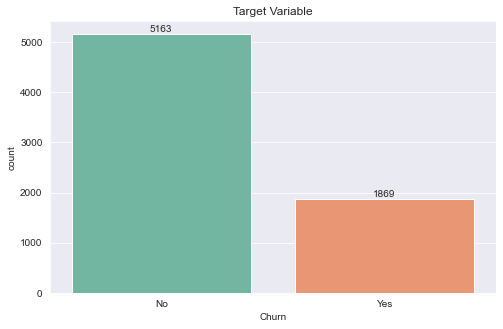

In [12]:
# Distribution of classes in target variable
plt.figure(figsize=(8,5))
ax = sns.countplot(x="Churn", palette="Set2", data=df_new)

for container in ax.containers:
    ax.bar_label(container)

plt.title("Target Variable")
plt.show()

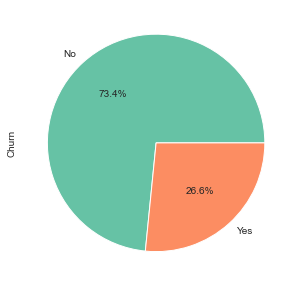

In [13]:
# Define Seaborn color palette to use
color = sns.color_palette("Set2")

# Subset data
data = df_new["Churn"].value_counts()
labels = df_new["Churn"].unique()

# Plot piechart
plt.figure(figsize=(8,5))
plt.pie(x=data, colors=color, labels=labels, autopct='%.1f%%')

plt.ylabel("Churn")
plt.show()

- The target variable is rather imbalanced. 73.4% of the observations belongs to class "No", while only 26.6% of the observations belong to class "Yes". This is something we will have in mind and consider moving forward.

### Numerical Features

In [14]:
# Groupby Churn to investigate numerical features
df_new.groupby(["Churn"])[["tenure", "MonthlyCharges", "TotalCharges"]].mean().T

Churn,No,Yes
tenure,37.650010,17.979133
MonthlyCharges,61.307408,74.441332
TotalCharges,2555.344141,1531.796094


#### Interesting insights:

#### Tenure (Months)
- Churning customers have an average tenure of 17.97 months.
- Non-churning customers have an average tenure of 37.56 months.
##### This suggests that customers that have stayed longer with the company are less likely to churn.

#### Monthly Charges
- Churning customers have average monthly charges of USD 74.44
- Non-churning customers have average monthly charges of USD 61.26
##### Customers that churn have higher monthly charges on average.

Mean: 32.421786120591584


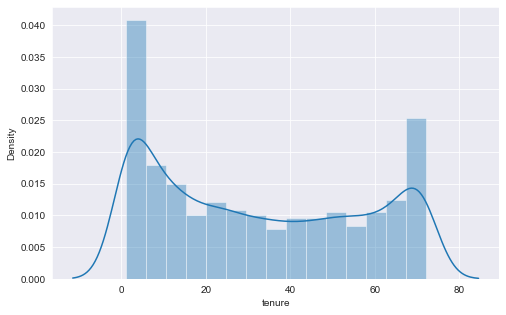

Mean: 64.79820819112632


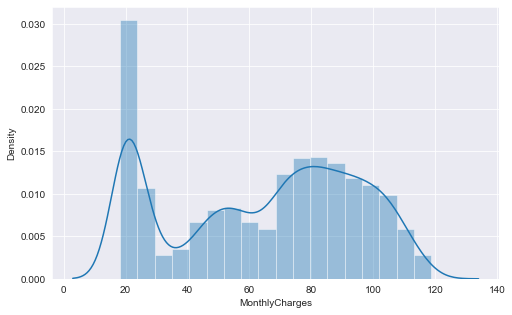

Mean: 2283.3004408418697


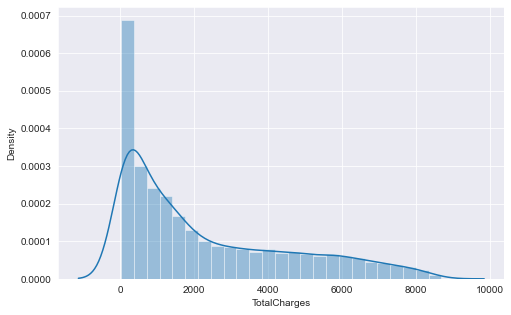

In [15]:
# Subset numerical features
num_features = ["tenure", "MonthlyCharges", "TotalCharges"]

for column in num_features:
    print("Mean:", df_new[column].mean())
    plt.figure(figsize=(8,5))
    
    sns.distplot(df_new[column], kde=True)
    plt.show()

- The numerical features have some skewness. We will look into this later. For now, let's see if there are any extreme outliers. 

The median is: 29.0


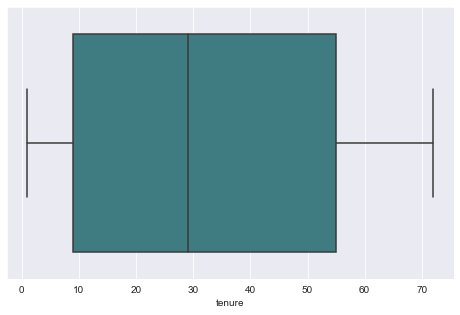

The median is: 70.35


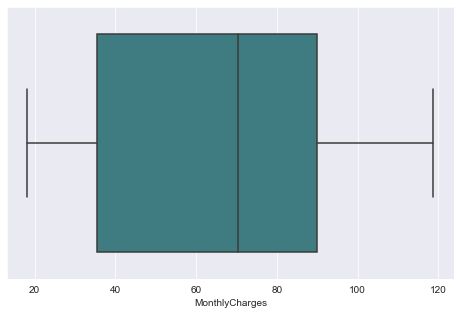

The median is: 1397.475


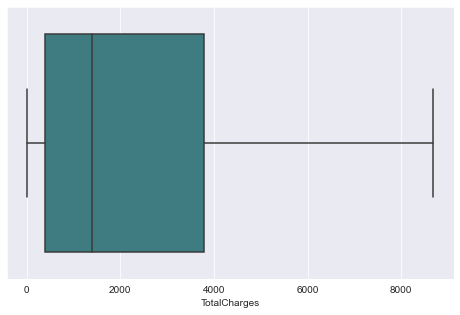

In [16]:
# Plot boxplots
for column in num_features:
    plt.figure(figsize=(8,5))
    sns.boxplot(x=column, data=df_new, palette="crest")
    
    print("The median is:",df_new[column].median())
    plt.show()

### Categorical Features

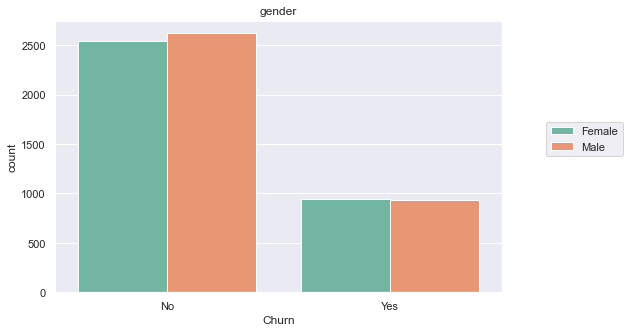

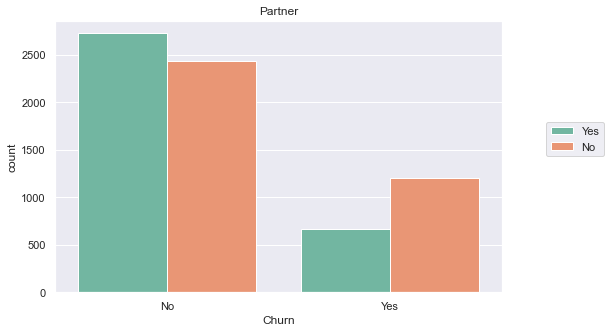

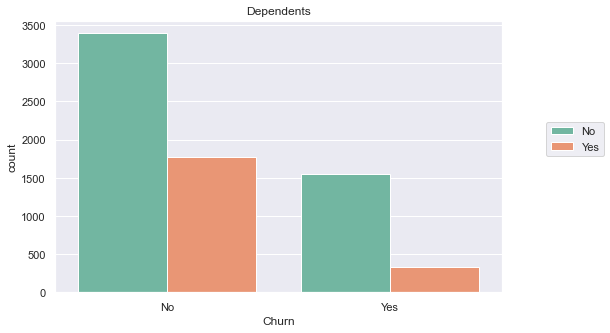

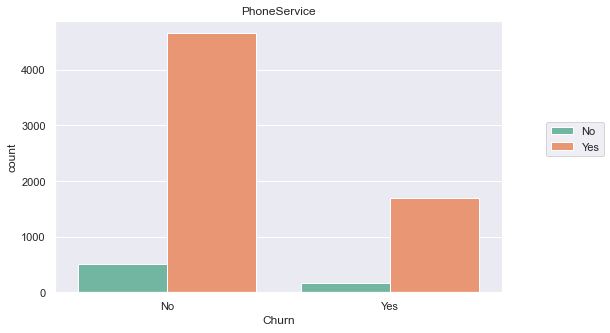

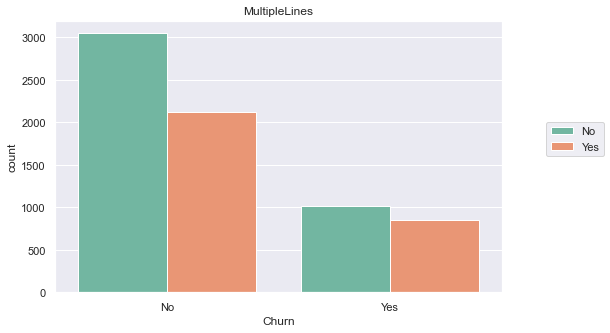

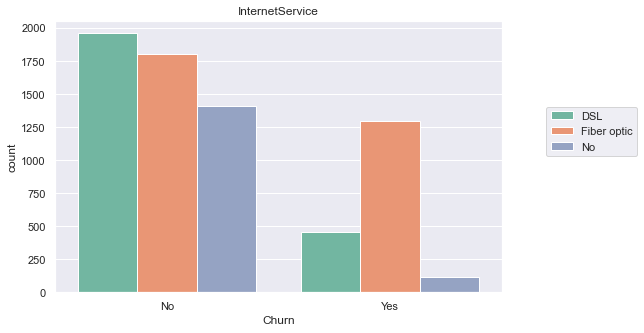

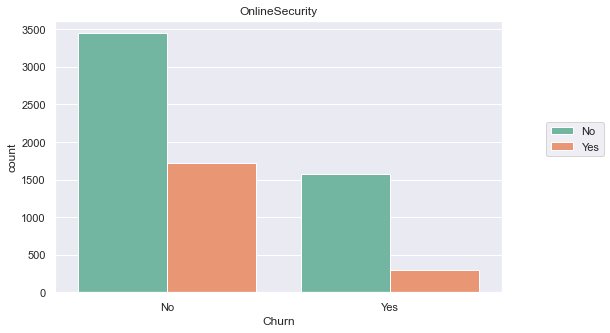

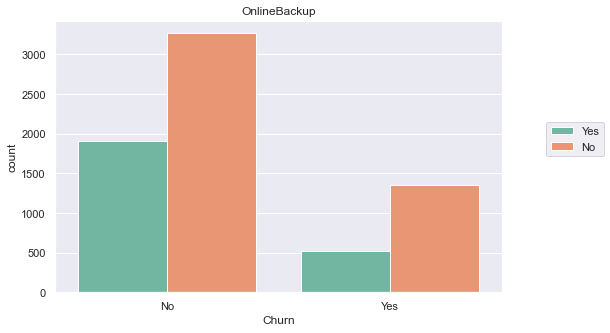

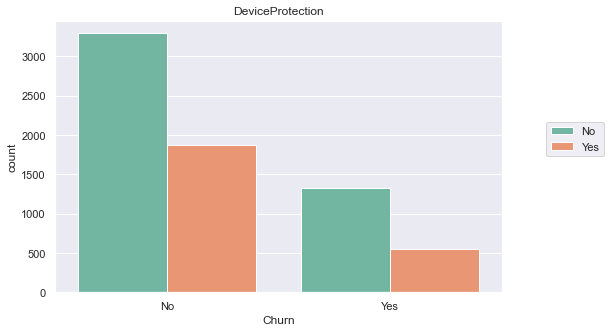

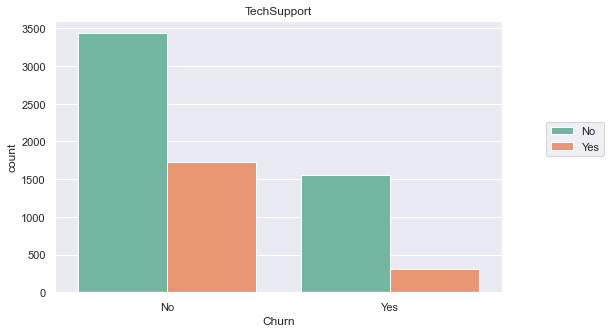

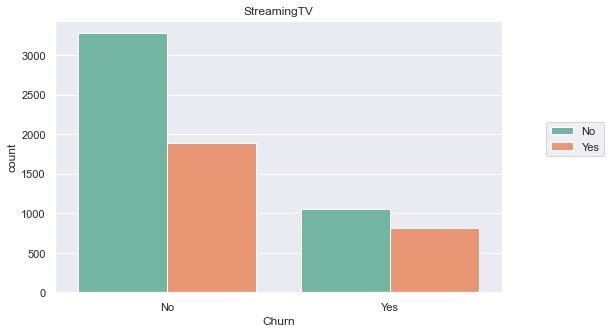

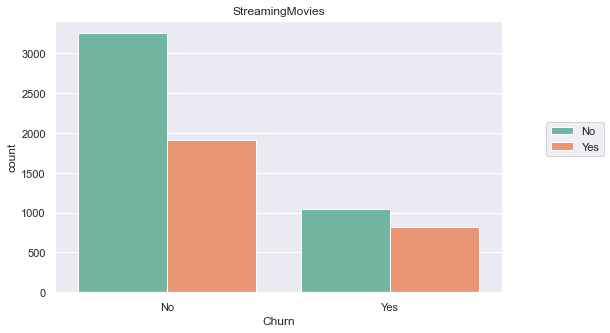

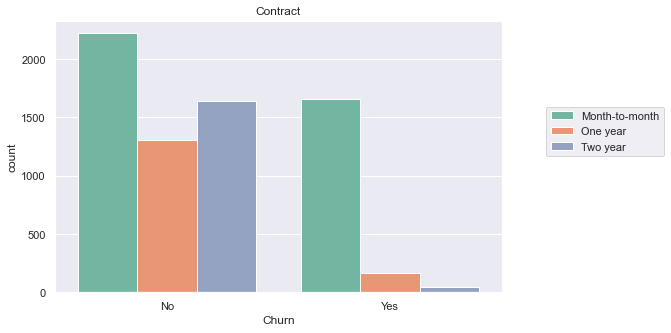

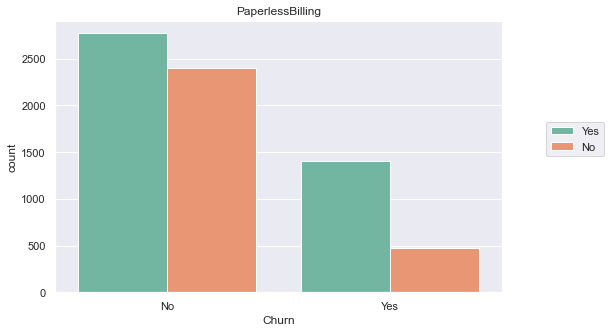

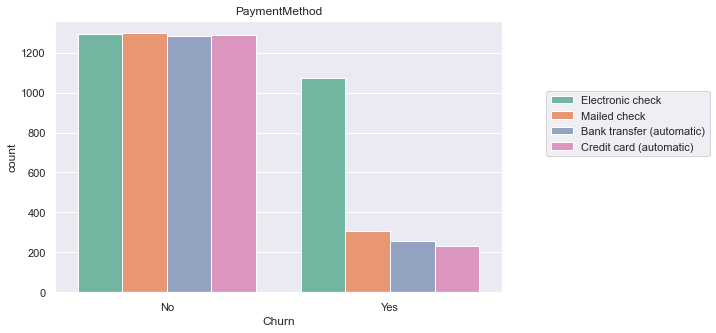

In [17]:
# Subset categorical features
categorical_col = df_new.select_dtypes("object").drop("Churn", axis=1).columns

# Investigate Churn by categorical feature
for column in categorical_col:
    
    sns.set(rc={"figure.figsize":(8,5)})
    
    sns.countplot(x="Churn", data=df_new, palette="Set2", hue=column)
    plt.title(column)
    plt.legend(loc=(1.1,0.5))
    plt.show()

#### Interesting insights:

#### Gender
- There is no deviation between men and women, they churn with the same frequency.

#### Partner
- The majority of churning customers are single.

#### Internet Service
- Most of the churning customers have fiber optic internet.

#### Contract
- The vast majority of churning customers have a month-to-month subscription based contract.

#### Payment Method
- The data suggest that most of the churning customers use electronic check as payment menthod.

## Feature Transformation

In [18]:
# Check the skewness of numerical features
df_skew = pd.DataFrame(num_features, columns=["Feature"])
df_skew["Skew"] = df_skew["Feature"].apply(lambda feature: stats.skew(df_new[feature]))

df_skew["Absolute Skew"] = np.abs(df_skew["Skew"])
df_skew["Skewed"] = df_skew["Absolute Skew"].apply(lambda skew: True if skew >= 0.5 else False)

In [19]:
df_skew

,Feature,Skew,Absolute Skew,Skewed
0,tenure,0.237680,0.237680,False
1,MonthlyCharges,-0.222056,0.222056,False
2,TotalCharges,0.961437,0.961437,True


In [20]:
# Transform "TotalCharges" using log transformation
df_new["TotalCharges"] = np.log(df_new["TotalCharges"])
df_new.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,3.396185,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,7.544068,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,4.683519,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,7.517928,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,5.021575,Yes


In [21]:
# Encode target variable
df_new["Churn"] = df_new["Churn"].map({"Yes": 1, "No": 0})
df_new.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,3.396185,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,7.544068,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,4.683519,1
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,7.517928,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,5.021575,1


In [22]:
# Get dummy variables
df_clean = pd.get_dummies(df_new, drop_first=True)
df_clean

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,3.396185,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,7.544068,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1
2,0,2,53.85,4.683519,1,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,7.517928,0,1,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0
4,0,2,70.70,5.021575,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,7.596141,0,1,1,1,1,1,0,0,1,0,1,1,1,1,1,0,1,0,0,1
7039,0,72,103.20,8.904209,0,0,1,1,1,1,1,0,0,1,1,0,1,1,1,0,1,1,0,0
7040,0,11,29.60,5.847739,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
7041,1,4,74.40,5.725544,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1


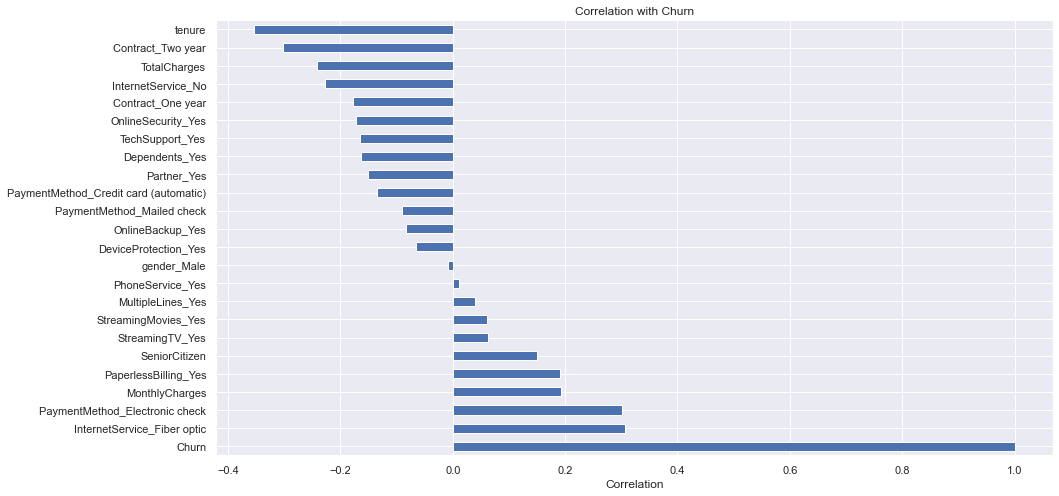

In [23]:
# Correlation between features and Churn
plt.figure(figsize=(15,8))
df_clean.corr()["Churn"].sort_values(ascending=False) \
    .plot(kind="barh")

plt.title("Correlation with Churn")
plt.xlabel("Correlation")
plt.show()

## SMOTE - Minority Class Oversampling TEchnique

- There are several methods that can be used to try and adjust an imbalanced dataset. In this project, we will make use of SMOTE to oversample the minority class in our target variable.

In [24]:
# Split the data
X = df_clean.drop("Churn", axis=1)
y = df_clean["Churn"]

# Oversample the minority class
smote = SMOTE(sampling_strategy="minority")
X_sm, y_sm = smote.fit_resample(X, y)

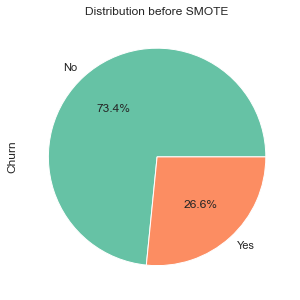

In [25]:
# Parameters for piechart
data = df_new["Churn"].value_counts()
color = sns.color_palette("Set2")

# Plot piechart
plt.figure(figsize=(8,5))
plt.pie(x=data,colors=color,labels=["No", "Yes"], autopct='%.1f%%')

plt.title("Distribution before SMOTE")
plt.ylabel("Churn")
plt.show()

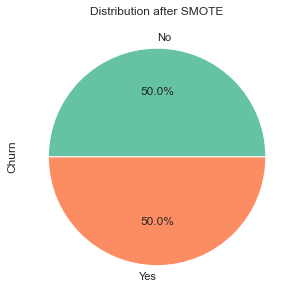

In [26]:
# Parameters for piechart
data = y_sm.value_counts()
color = sns.color_palette("Set2")

# Plot piechart
plt.figure(figsize=(8,5))
plt.pie(x=data, labels=["No", "Yes"], colors=color, autopct='%.1f%%')

plt.title("Distribution after SMOTE")
plt.ylabel("Churn")
plt.show()

In [27]:
print("Original dataset: {}".format(Counter(y)))
print("SMOTE dataset: {}".format(Counter(y_sm)))

Original dataset: Counter({0: 5163, 1: 1869})
SMOTE dataset: Counter({0: 5163, 1: 5163})


## Train Test Split

In [28]:
# Train and test split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)

print("X_train:", X_train.shape)
print("X_test", X_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)

X_train: (8260, 23)
X_test (2066, 23)
y_train (8260,)
y_test (2066,)


In [29]:
# Cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

## Feature Scaling

In [30]:
# Scale the numerical features - "tenure", "MonthlyCharges", "TotalCharges"
scaler = StandardScaler()
X_train.loc[:, num_features] = scaler.fit_transform(X_train.loc[:, num_features])
X_test.loc[:, num_features] = scaler.transform(X_test.loc[:, num_features])

X_train.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
9031,0,-0.812592,0.422801,-0.112464,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
8100,0,-0.979274,0.284760,-0.547514,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0
8400,0,-1.104286,-0.776587,-1.705063,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
828,0,0.937573,1.417502,1.185726,0,1,0,1,1,1,0,1,1,0,1,1,1,1,0,0,0,1,0
6964,0,-0.145862,-0.115422,0.388204,0,1,1,1,1,0,0,1,1,1,0,0,0,0,1,0,0,1,0


## Logistic Regression

In [36]:
# Create basemodel
log_model = LogisticRegression(random_state=42)

# Define parameter grid
param_grid = {
    "C":10.0**np.arange(-2,3),
    "penalty":["l2", "l1"]
}

# GridSearchCV 
grid_log = GridSearchCV(estimator=log_model, param_grid=param_grid,
                         scoring="f1", n_jobs=-1,
                          cv=cv, verbose=1)

# Fit the model on the training data
grid_log.fit(X_train, y_train)

print("Best parameters for Logistic Regression:", grid_log.best_params_)
print("Best score:", grid_log.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for Logistic Regression: {'C': 10.0, 'penalty': 'l2'}
Best score: 0.8325764708512944


In [37]:
# Make predictions with tuned model
log_pred = grid_log.predict(X_test)
print(classification_report(y_test, log_pred))

              precision    recall  f1-score   support

           0       0.84      0.81      0.82      1037
           1       0.81      0.85      0.83      1029

    accuracy                           0.83      2066
   macro avg       0.83      0.83      0.83      2066
weighted avg       0.83      0.83      0.83      2066



In [38]:
# Function for confusion matrix
def conf_matrix(y_t, model_pred, model_name):
    
    sns.heatmap(confusion_matrix(y_t, model_pred),
                cmap="BuPu", annot=True, fmt=".3g")
    
    plt.title(model_name)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()    

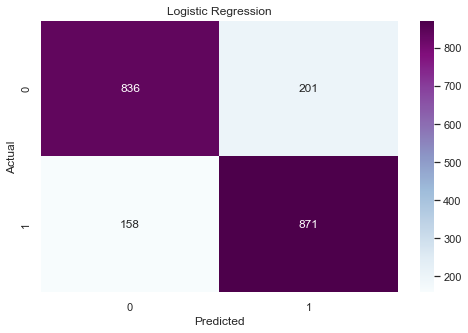

In [39]:
# Confusion matrix - Logistic Regression
conf_matrix(y_test, log_pred, "Logistic Regression")

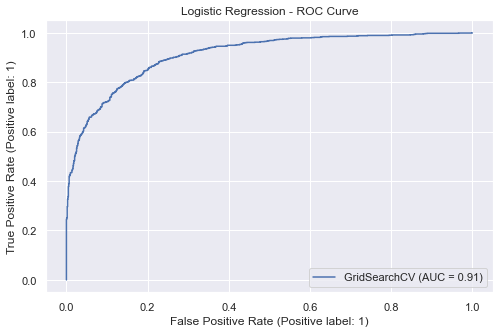

In [51]:
# Plot ROC for AdaBoost
RocCurveDisplay.from_estimator(estimator=grid_log, 
                               X=X_test, 
                               y=y_test)
plt.title("Logistic Regression - ROC Curve")
plt.show()

## AdaBoost

In [43]:
# create base model
ada_model = AdaBoostClassifier(random_state=42)

# Define search space
param_grid = {
    "n_estimators":[50, 100, 200, 500],
    "learning_rate":[0.001, 0.01, 0.1, 1]
}

# GridSerachCV
grid_ada = GridSearchCV(estimator=ada_model, param_grid=param_grid,
                         scoring="f1",
                         cv=cv, verbose=1)

# Fit the model on the training data
grid_ada.fit(X_train, y_train)


print("Best parameters for AdaBoost:", grid_ada.best_params_)
print("Best F1-Score:", grid_ada.best_score_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters for AdaBoost: {'learning_rate': 1, 'n_estimators': 500}
Best F1-Score: 0.8311889343196898


In [44]:
# Make predictions with tuned model
ada_pred = grid_ada.predict(X_test)
print(classification_report(y_test, ada_pred))

              precision    recall  f1-score   support

           0       0.85      0.79      0.82      1037
           1       0.80      0.86      0.83      1029

    accuracy                           0.83      2066
   macro avg       0.83      0.83      0.83      2066
weighted avg       0.83      0.83      0.83      2066



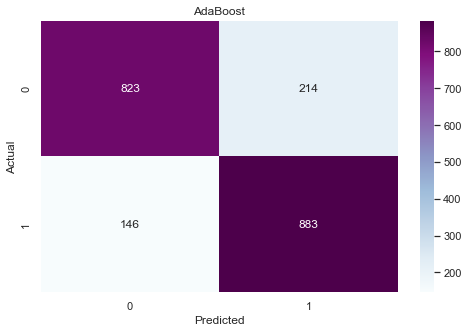

In [45]:
# Confusion matrix - AdaBoost
conf_matrix(y_test, ada_pred, "AdaBoost")

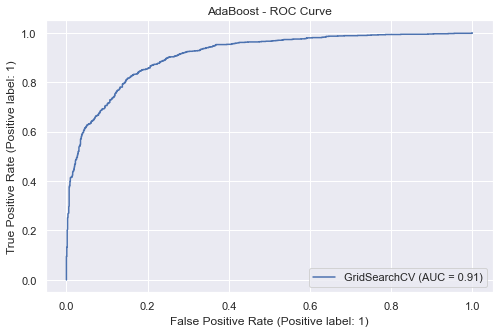

In [53]:
# Plot ROC for AdaBoost model
RocCurveDisplay.from_estimator(estimator=grid_ada, 
                               X=X_test, 
                               y=y_test)
plt.title("AdaBoost - ROC Curve")
plt.show()

## Random Forest


In [40]:
# Basemodel
rf_model = RandomForestClassifier(random_state=42)

param_grid = {
    "n_estimators":[100, 300, 500, 1000],
    "max_depth":[None, 4, 5, 6],
    "criterion":["gini", "entropy"]

}

# GridSearchCV
grid_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                         scoring="f1", n_jobs=-1,
                         cv=cv, verbose=1)

# Fit the model on the training data
grid_rf.fit(X_train, y_train)


print("Best parameters for RandomForest:", grid_rf.best_params_)
print("Best F1-Score:", grid_rf.best_score_)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best parameters for RandomForest: {'criterion': 'entropy', 'max_depth': None, 'n_estimators': 1000}
Best F1-Score: 0.8533034950604774


In [41]:
# Make predictions with tuned model
rf_pred = grid_rf.predict(X_test)
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84      1037
           1       0.83      0.86      0.85      1029

    accuracy                           0.84      2066
   macro avg       0.84      0.84      0.84      2066
weighted avg       0.84      0.84      0.84      2066



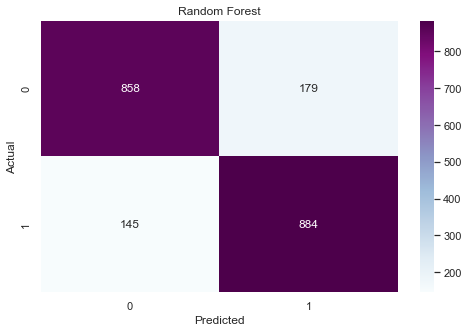

In [42]:
# Confusion matrix - Random Forest
conf_matrix(y_test, rf_pred, "Random Forest")

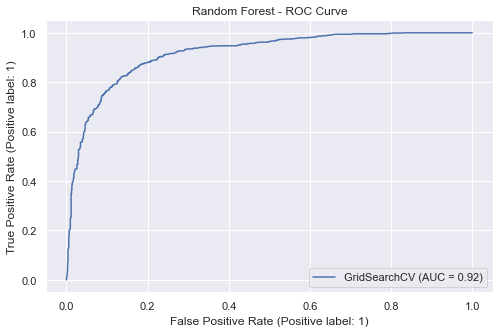

In [52]:
# Plot ROC for Random Forest model
RocCurveDisplay.from_estimator(estimator=grid_rf, 
                               X=X_test, 
                               y=y_test)
plt.title("Random Forest - ROC Curve")
plt.show()

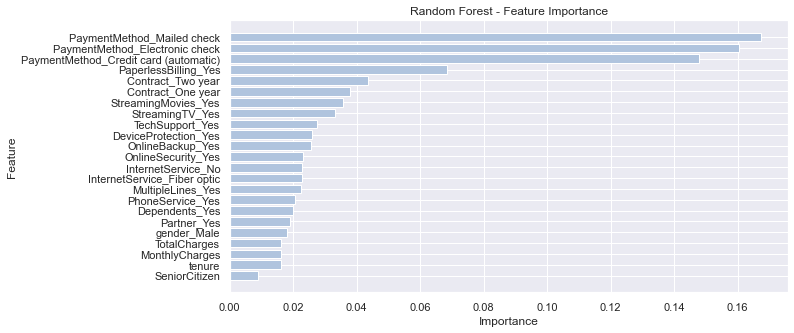

In [82]:
plt.figure(figsize=(10,5))

# Get feature importances
importance_vals = grid_rf.best_estimator_.feature_importances_
indices = np.argsort(importance_vals)

# Plot feature importances
plt.barh(X_train.columns, importance_vals[indices],  color='lightsteelblue')

plt.title("Random Forest - Feature Importance")
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

## Performance Summary

In [46]:
# Store metrics for Logistic Regression
log_f1 = f1_score(y_test, log_pred)
log_precision = precision_score(y_test, log_pred)
log_recall = recall_score(y_test, log_pred)

# Store metrics Random Forest
rf_f1 = f1_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)

# Store metrics for AdaBoost
ada_f1 = f1_score(y_test, ada_pred)
ada_precision = precision_score(y_test, ada_pred)
ada_recall = recall_score(y_test, ada_pred)

# Create df with metrics
model_performance = pd.DataFrame({
    "Model_Name":["Logistic Regression", "Random Forest", "AdaBoost"],
    "Precision": [log_precision, rf_precision, ada_precision],
    "Recall": [log_recall, rf_recall, ada_recall],
    "F1-Score": [log_f1, rf_f1, ada_f1]   
    
}).set_index("Model_Name")

In [47]:
model_performance.sort_values("F1-Score", ascending=False)

,Precision,Recall,F1-Score
Model_Name,,,
Random Forest,0.831609,0.859086,0.845124
AdaBoost,0.804923,0.858115,0.830668
Logistic Regression,0.812500,0.846453,0.829129


- All three models are fairly comparable when it comes to performance. However, the Random Forest model has the highest Precision, Recall, and F1-Score. Therefore, it would be our model of choice in this scenario.


- The most important features according to the Random Forest model are related to payment method and contract type.